# IMPORTING PACKAGES/FUNCTIONS

In [1]:
## few important functions/methods from sklearn package
import sklearn as sk
from sklearn.linear_model import RidgeClassifierCV,RidgeCV, LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score,KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score,auc, f1_score,confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')


## LOADING DATASETS

In [4]:
import pandas as pd

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### PERFORMING EDA INTO THE DATASETS

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### DROPPING COLUMNS WHICH DOESN'T CONTRIBUTE POSITIVLEY IN TRAINING DATA

In [11]:
train.drop(['PassengerId'],axis=1,inplace=True)


In [12]:
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [13]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
train['Embarked'].fillna(value= 'S',inplace= True)
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [17]:
train['Age'].fillna(method= 'bfill',inplace = True)
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [18]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
# encoding
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [21]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
train['Sex'] = train.Sex.map({'male':0,'female':1})
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [23]:
train2 = pd.get_dummies(train)
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


### SOME VISUALISATION TECHINQUES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017342C8B888>,
      dtype=object)

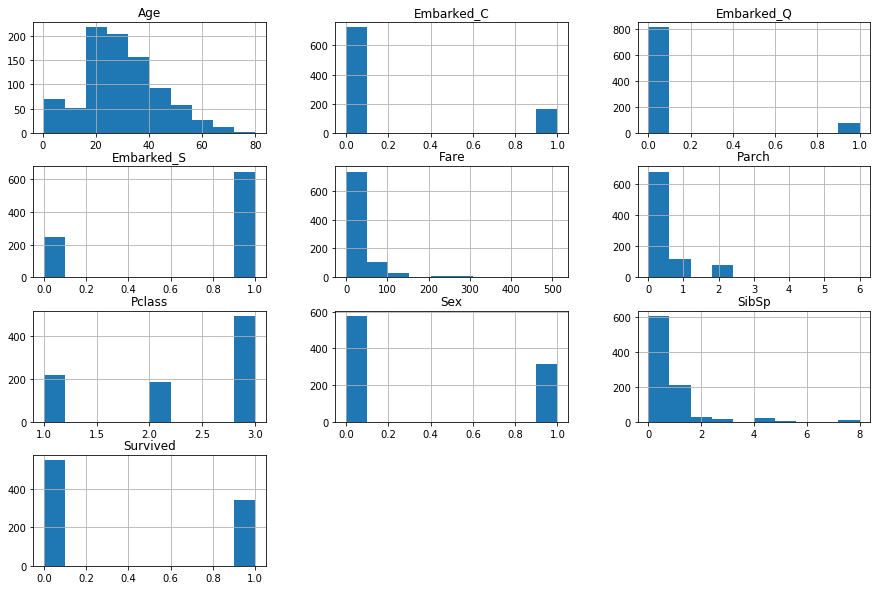

In [24]:
train2.hist(figsize=(15,10))

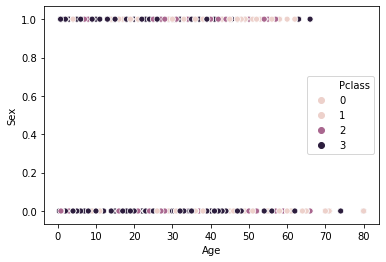

In [25]:
sns.scatterplot(x=train2['Age'],y=train2['Sex'],hue=train2['Pclass'])

In [26]:
train2.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.055505,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.131900,-0.295367,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.543351,-0.131900,1.000000,-0.061342,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
Age,-0.055505,-0.295367,-0.061342,1.000000,-0.204810,-0.161386,0.085406,0.017339,0.014411,-0.024259
SibSp,-0.035322,0.083081,0.114631,-0.204810,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,0.245489,-0.161386,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.182333,0.085406,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,0.168240,-0.243292,0.082853,0.017339,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,0.074115,0.014411,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.119224,-0.024259,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


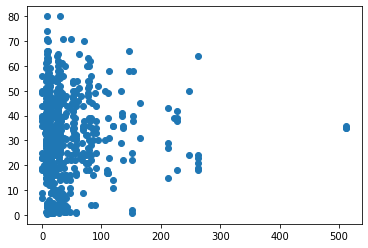

In [27]:
plt.scatter(train2['Fare'],train2['Age'])

In [28]:
train2.Fare = np.log1p(train2.Fare) 
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,2.110213,0,0,1
1,1,1,1,38.0,1,0,4.280593,1,0,0
2,1,3,1,26.0,0,0,2.188856,0,0,1
3,1,1,1,35.0,1,0,3.990834,0,0,1
4,0,3,0,35.0,0,0,2.202765,0,0,1


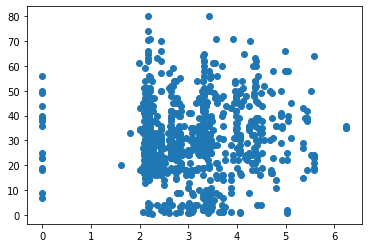

In [29]:
plt.scatter(train2['Fare'],train2['Age'])

In [30]:
from scipy import stats

#### checking for correlation

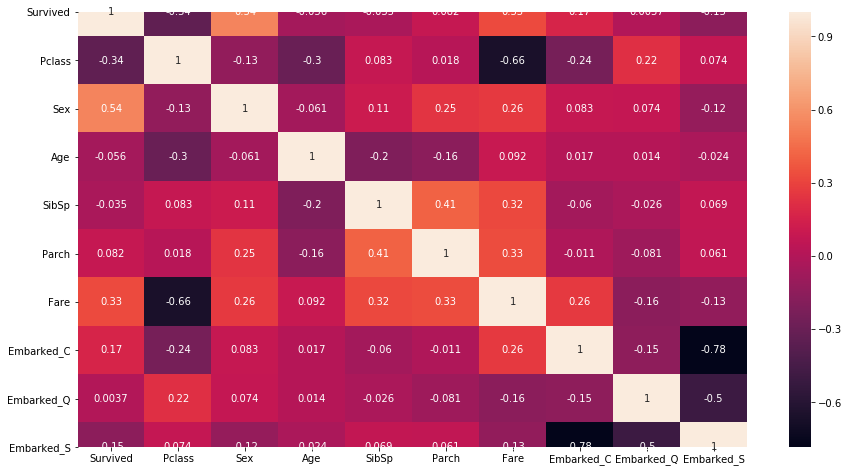

In [31]:
cor_=train2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(cor_,annot= True)

# EDA in test Data

In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


In [34]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [35]:
test.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [36]:
test['Age'].fillna(method= 'bfill',inplace = True)

In [37]:
test.Fare.median()

14.4542

In [38]:
test.Age.median()

27.0

In [39]:
test['Age'].fillna(value= 27,inplace = True)

In [40]:
test['Fare'].fillna(value= 27,inplace = True)

In [41]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [42]:
test['Sex'] = test.Sex.map({'male':0,'female':1})
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S


In [43]:
test2 = pd.get_dummies(test)
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [44]:
test2.Fare = np.log1p(test2.Fare) 
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,2.178064,0,1,0
1,893,3,1,47.0,1,0,2.079442,0,0,1
2,894,2,0,62.0,0,0,2.369075,0,1,0
3,895,3,0,27.0,0,0,2.268252,0,0,1
4,896,3,1,22.0,1,1,2.586824,0,0,1


In [45]:
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,2.110213,0,0,1
1,1,1,1,38.0,1,0,4.280593,1,0,0
2,1,3,1,26.0,0,0,2.188856,0,0,1
3,1,1,1,35.0,1,0,3.990834,0,0,1
4,0,3,0,35.0,0,0,2.202765,0,0,1


In [46]:
X = train2[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]
y = train2['Survived']

In [47]:
from sklearn.preprocessing import StandardScaler, Normalizer

### Scaling traing and testing data

In [48]:
scale  = StandardScaler() 
scale  = scale.fit(X)
X_     = scale.transform(X)  # scaling train features
X_test_ = scale.transform(test2[X.columns]) # scaling test features

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=56, stratify = y)

In [50]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test_.shape)

(891, 9)
(891,)
(712, 9)
(179, 9)
(712,)
(179,)
(418, 9)


In [51]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,2.110213,0,0,1


In [52]:
X_

array([[ 0.82737724, -0.73769513, -0.53946848, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  1.35557354,  0.55721262, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  1.35557354, -0.26529821, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  1.35557354, -0.26529821, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.73769513, -0.26529821, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.73769513,  0.14595721, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [53]:
X_test_

array([[ 0.82737724, -0.73769513,  0.31731363, ..., -0.48204268,
         3.25137334, -1.62380254],
       [ 0.82737724,  1.35557354,  1.17409574, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-0.36936484, -0.73769513,  2.20223427, ..., -0.48204268,
         3.25137334, -1.62380254],
       ...,
       [ 0.82737724, -0.73769513,  0.59148391, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.82737724, -0.73769513, -0.19675564, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.82737724, -0.73769513, -0.19675564, ...,  2.0745051 ,
        -0.30756234, -1.62380254]])

In [54]:
## few important functions/methods from sklearn package
from sklearn.linear_model import RidgeClassifierCV,RidgeCV, LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score,KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score,auc, f1_score,confusion_matrix
from sklearn.impute import SimpleImputer

# Creating the model by fitting

### Logistic Regression Model

In [55]:
#### base model

model_cl = LogisticRegression()
model_cl = model_cl.fit(X_train, y_train) #### training 
predict_train = model_cl.predict(X_test)

In [56]:
print(X_.shape)
print(predict_train.shape)

(891, 9)
(179,)


In [57]:
accuracy_score(y_test, predict_train)

0.7318435754189944

In [58]:
### prediction on the test.csv

y_test2 = model_cl.predict(X_test_)
# y_test
print(X_test_.shape)
print(y_test2.shape)

(418, 9)
(418,)


In [59]:
test2.shape

(418, 10)

In [60]:
# test2['Survived'] = y_test2


In [61]:
### save dataframe as csv file
# test3[['PassengerId','Survived']].to_csv('submission.csv', index = False)

### Random Forest Model

In [62]:
#### Randomforest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print(accuracy_score(y_train, model_rf.predict(X_train)))
print(accuracy_score(y_test, model_rf.predict(X_test)))

0.9747191011235955
0.7486033519553073


# tuning hyper parameters

In [63]:
from sklearn.linear_model import RidgeClassifierCV,RidgeCV, LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score,KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score,auc, f1_score,confusion_matrix
from sklearn.impute import SimpleImputer

### Logistic Regression Model Tuning

In [64]:
# model_cl = LogisticRegression()

In [65]:
param = {'C':[0.1,1,10],
        'penalty':['l1','l2'] }#PENALTIES ARE USED TO SHRINK THE CORRELATED FEATURES WITHOUT REMOVING IN L2
                               # L1 PENALTY IS USED TO SHRINK THE USELESS FEATURE TO ZERO, 
                               # USED IN FEATURE ENGINEERING AND IMPORTANT FEATURE SELECTION
# Using GRID SEARCH CV
gs = GridSearchCV(estimator=model_cl, param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [66]:
#  Grid Search 
## fiting
gs = gs.fit(X_train,y_train)
gs.best_score_

0.8061797752808989

In [67]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [68]:
## accuracy on validation dataset
accuracy_score(y_test, gs.predict(X_test))

0.7318435754189944

In [69]:
pd.DataFrame(gs.cv_results_).sort_values(by = ['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.015625,3.371748e-07,0.000000,0.000000,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.764706,0.810127,0.843882,0.806180,0.032455,1
0,0.010417,7.366145e-03,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.760504,0.814346,0.827004,0.800562,0.028851,2
2,0.005208,7.365358e-03,0.005208,0.007365,1,l1,"{'C': 1, 'penalty': 'l1'}",0.760504,0.810127,0.827004,0.799157,0.028242,3
3,0.005208,7.365808e-03,0.000000,0.000000,1,l2,"{'C': 1, 'penalty': 'l2'}",0.756303,0.810127,0.831224,0.799157,0.031563,3
4,0.010415,7.364797e-03,0.000000,0.000000,10,l1,"{'C': 10, 'penalty': 'l1'}",0.756303,0.810127,0.831224,0.799157,0.031563,3
5,0.005208,7.365808e-03,0.000000,0.000000,10,l2,"{'C': 10, 'penalty': 'l2'}",0.756303,0.810127,0.831224,0.799157,0.031563,3


### Random Forest classifier Model Tuning

In [70]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
param = {'max_depth':[1,2,3,4],
        'max_features':['auto','sqrt'] }

gs_r = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [72]:
gs_r = gs_r.fit(X_train, y_train)
print(accuracy_score(y_train, gs_r.predict(X_train)))
print(accuracy_score(y_test, gs_r.predict(X_test)))

0.8398876404494382
0.8044692737430168


### prediction on the test.csv

In [73]:
y_testsetRF = gs_r.predict(X_test_)

In [74]:
print(X_test_.shape)
print(y_testsetRF.shape)

(418, 9)
(418,)


In [75]:
test2.shape

(418, 10)

In [76]:
test2['Survived'] = y_testsetRF
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,0,34.5,0,0,2.178064,0,1,0,0
1,893,3,1,47.0,1,0,2.079442,0,0,1,0
2,894,2,0,62.0,0,0,2.369075,0,1,0,0
3,895,3,0,27.0,0,0,2.268252,0,0,1,0
4,896,3,1,22.0,1,1,2.586824,0,0,1,0


In [77]:
### save dataframe as csv file
test2[['PassengerId','Survived']].to_csv('submission.csv', index = False)

In [78]:
pd.DataFrame(gs_r.cv_results_).sort_values(by = ['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.020832,7.365415e-03,0.010417,0.007366,4,auto,"{'max_depth': 4, 'max_features': 'auto'}",0.798319,0.822785,0.843882,0.821629,0.018625,1
7,0.015625,1.367303e-06,0.005209,0.007366,4,sqrt,"{'max_depth': 4, 'max_features': 'sqrt'}",0.781513,0.839662,0.827004,0.816011,0.024985,2
2,0.020833,7.365021e-03,0.005208,0.007365,2,auto,"{'max_depth': 2, 'max_features': 'auto'}",0.777311,0.856540,0.793249,0.808989,0.034213,3
5,0.031249,2.973602e-07,0.000000,0.000000,3,sqrt,"{'max_depth': 3, 'max_features': 'sqrt'}",0.756303,0.831224,0.827004,0.804775,0.034391,4
3,0.026041,7.365415e-03,0.000000,0.000000,2,sqrt,"{'max_depth': 2, 'max_features': 'sqrt'}",0.752101,0.835443,0.814346,0.800562,0.035401,5
4,0.026041,7.365527e-03,0.010416,0.007366,3,auto,"{'max_depth': 3, 'max_features': 'auto'}",0.781513,0.814346,0.797468,0.797753,0.013410,6
0,0.031250,2.247832e-07,0.000000,0.000000,1,auto,"{'max_depth': 1, 'max_features': 'auto'}",0.743697,0.827004,0.717300,0.762640,0.046725,7
1,0.026040,7.365471e-03,0.010417,0.007366,1,sqrt,"{'max_depth': 1, 'max_features': 'sqrt'}",0.680672,0.746835,0.784810,0.737360,0.043052,8
